In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [35]:
X, y = make_blobs(300, 2, random_state=0, cluster_std=1.5)
X += 100

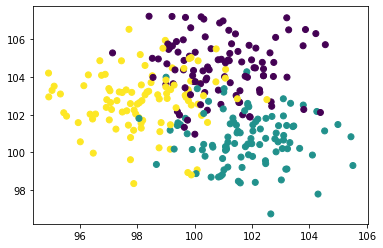

In [36]:
plt.scatter(X[:,0], X[:,1], c=y)

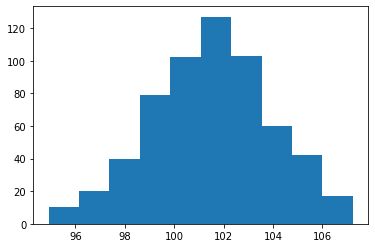

In [37]:
plt.hist(X.flatten());

In [38]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [40]:
model = GaussianNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test)  ) )

0.8


,0,1,2
0,15,0,6
1,1,16,2
2,3,0,17


In [41]:
model = BernoulliNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test)  ) )

0.31666666666666665


,0,1,2
0,0,21,0
1,0,19,0
2,0,20,0


In [42]:
model = MultinomialNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test)  ) )

0.5666666666666667


,0,1,2
0,0,3,18
1,0,16,3
2,0,2,18


In [44]:
pd.DataFrame(X).corr()

,0,1
0,1.000000,-0.148864
1,-0.148864,1.000000


In [47]:
pd.DataFrame(X[:200]).corr()

,0,1
0,1.000000,-0.146869
1,-0.146869,1.000000


In [48]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test)  ) )

0.8


,0,1,2
0,15,4,2
1,1,17,1
2,3,1,16


In [50]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test)  ) )

0.7666666666666667


,0,1,2
0,14,0,7
1,2,15,2
2,3,0,17


### Klasyfikacja tesktu spam/ham z wykorzystaniem NB

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
sentences = ["Julia kocha Marka", "Marek kocha Annę", "Anna i Julia kochają Marka"]

In [54]:
cv = CountVectorizer()
wm = cv.fit_transform(sentences)

In [55]:
wm

<3x7 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [57]:
cv.get_feature_names_out()

array(['anna', 'annę', 'julia', 'kocha', 'kochają', 'marek', 'marka'],
      dtype=object)

In [61]:
pd.DataFrame(wm.toarray(), columns=cv.get_feature_names_out() )

,anna,annę,julia,kocha,kochają,marek,marka
0,0,0,1,1,0,0,1
1,0,1,0,1,0,1,0
2,1,0,1,0,1,0,1


In [65]:
pd.set_option("max_colwidth", None)
df = pd.read_csv("http://51.91.120.89/extras/SMSSpamCollection.csv", 
                 sep="\t", header=None, names=["label","text"])
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


In [66]:
df.label.unique()

array(['ham', 'spam'], dtype=object)

In [67]:
df.label = df.label.map({
    "ham":0, "spam":1
})

In [68]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"


In [73]:
df.text = df.text.str.replace("[^\w\s]", "")

C:\Users\kurs\AppData\Local\Temp/ipykernel_4112/1338821350.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.text = df.text.str.replace("[^\w\s]", "")


In [74]:
df

,label,text
0,0,Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat
1,0,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s
3,0,U dun say so early hor U c already then say
4,0,Nah I dont think he goes to usf he lives around here though
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u U have won the 750 Pound prize 2 claim is easy call 087187272008 NOW1 Only 10p per minute BTnationalrate
5568,0,Will ü b going to esplanade fr home
5569,0,Pity was in mood for that Soany other suggestions
5570,0,The guy did some bitching but I acted like id be interested in buying something else next week and he gave it to us for free


In [75]:
cv = CountVectorizer()

In [76]:
cv.fit(df.text) # budowanie leksykonu
wm = cv.transform(df.text)

In [77]:
wm.toarray().shape

(5572, 9546)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(wm.toarray(), df.label, 
                                                    test_size=.2, random_state=0)

In [80]:
model = GaussianNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test)  ) )

0.9049327354260089


,0,1
0,860,95
1,11,149


In [81]:
model = BernoulliNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test)  ) )

0.97847533632287


,0,1
0,953,2
1,22,138


In [82]:
model = MultinomialNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test)  ) )

0.9757847533632287


,0,1
0,936,19
1,8,152


In [83]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test)  ) )

0.9130044843049328


,0,1
0,955,0
1,97,63


### Weryfikacja

In [84]:
model = MultinomialNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test)  ) )

0.9757847533632287


,0,1
0,936,19
1,8,152


In [88]:
txt = "extra promo buy now"
sample = cv.transform([txt])
model.predict(sample), model.predict_proba(sample)

(array([1], dtype=int64), array([[0.48569464, 0.51430536]]))

In [89]:
txt = "please call me now"
sample = cv.transform([txt])
model.predict(sample), model.predict_proba(sample)

(array([0], dtype=int64), array([[0.84331957, 0.15668043]]))

In [90]:
# regresja logistyczna dla porównania
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test)  ) )

0.9820627802690582


,0,1
0,952,3
1,17,143
